# How do I work with dates and times in pandas?
https://www.youtube.com/watch?v=yCgJGsg0Xa4

In [1]:
import pandas as pd

In [3]:
ufo = pd.read_csv("data/ufo.csv")

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
# time string olarak tutulmuş
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [6]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [9]:
# datatime a dönüşmüş
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [12]:
# bu sayede zamanın belli bölümlerini kulalnabiliriz.
ufo.Time.dt.hour
# yada 
ufo.Time.dt.weekday_name
# ya da https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties 

0           Sunday
1           Monday
2           Sunday
3           Monday
4          Tuesday
5         Saturday
6         Saturday
7        Wednesday
8         Thursday
9          Tuesday
10          Sunday
11        Thursday
12          Friday
13          Friday
14          Sunday
15       Wednesday
16       Wednesday
17          Monday
18       Wednesday
19          Friday
20         Tuesday
21          Sunday
22          Sunday
23          Friday
24        Saturday
25        Saturday
26        Saturday
27          Sunday
28        Thursday
29          Friday
           ...    
18211     Thursday
18212     Thursday
18213     Thursday
18214       Friday
18215       Friday
18216       Friday
18217       Friday
18218       Friday
18219       Friday
18220       Friday
18221       Friday
18222       Friday
18223       Friday
18224       Friday
18225     Saturday
18226     Saturday
18227     Saturday
18228       Sunday
18229       Sunday
18230       Sunday
18231       Sunday
18232       

In [16]:
# 1999 dan sonrakileri bulmak için 
ts = pd.to_datetime("1/1/1999")
ufo.loc[ufo.Time > ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [21]:
# 2 tarihi birbirinden çıkarırsak timedelta objesi oluşur.
(ufo.Time.max()-ufo.Time.min()).days

25781

In [24]:
# grafik yapacağız
ufo['Year'] = ufo.Time.dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [25]:
%matplotlib inline

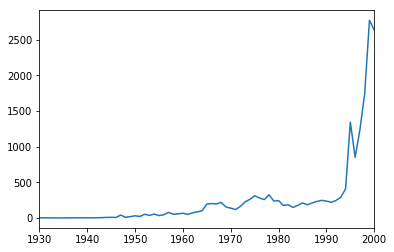

In [27]:
# yıllara göre kayıtları görebiliriz.
ufo.Year.value_counts().sort_index().plot()